# Dataset 2: Anemia Records

## Basic EDA

In [22]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, '../src/')
import helper_functions as helpers

In [23]:
full = pd.read_csv('../data/Anemia.csv')

anemia = full[full['IDENTIFICATION'] == 'Anemia']
no_anemia = full[full['IDENTIFICATION'] == 'Not Anemia']

male_anemia = anemia[anemia['GENDER'] == 'Male']
female_anemia = anemia[anemia['GENDER'] == 'Female']

male_no_anemia = no_anemia[no_anemia['GENDER'] == 'Male']
female_no_anemia = no_anemia[no_anemia['GENDER'] == 'Female']

In [24]:
full['MINIMUM_EXPECTED'] = full['REFERENCE_INTERVAL'].apply(helpers.find_min)

In [25]:
full['MAXIMUM_EXPECTED'] = full['REFERENCE_INTERVAL'].apply(helpers.find_max)

In [26]:
full.head()

,NO,LAB_TEST,RESULT,REFERENCE_INTERVAL,GENDER,IDENTIFICATION,MINIMUM_EXPECTED,MAXIMUM_EXPECTED
0,1,Hemoglobin,14.9,13.5 - 17.5,Male,Not Anemia,13.5,17.5
1,1,MCH,22.7,27.0 - 31.0,Male,Not Anemia,27.0,31.0
2,1,MCHC,29.1,32.0 - 36.0,Male,Not Anemia,32.0,36.0
3,1,MCV,83.7,82.0 - 92.0,Male,Not Anemia,82.0,92.0
4,2,Hemoglobin,15.9,12.0 - 16.0,Female,Not Anemia,12.0,16.0


In [27]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NO                  5684 non-null   int64  
 1   LAB_TEST            5684 non-null   object 
 2   RESULT              5684 non-null   float64
 3   REFERENCE_INTERVAL  5684 non-null   object 
 4   GENDER              5684 non-null   object 
 5   IDENTIFICATION      5684 non-null   object 
 6   MINIMUM_EXPECTED    5684 non-null   float64
 7   MAXIMUM_EXPECTED    5684 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 355.4+ KB


In [28]:
anemia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2480 entries, 8 to 5683
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NO                  2480 non-null   int64  
 1   LAB_TEST            2480 non-null   object 
 2   RESULT              2480 non-null   float64
 3   REFERENCE_INTERVAL  2480 non-null   object 
 4   GENDER              2480 non-null   object 
 5   IDENTIFICATION      2480 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 135.6+ KB


In [29]:
no_anemia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3204 entries, 0 to 5679
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NO                  3204 non-null   int64  
 1   LAB_TEST            3204 non-null   object 
 2   RESULT              3204 non-null   float64
 3   REFERENCE_INTERVAL  3204 non-null   object 
 4   GENDER              3204 non-null   object 
 5   IDENTIFICATION      3204 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 175.2+ KB


In [30]:
anemia_group = anemia.groupby('LAB_TEST')
no_anemia_group = no_anemia.groupby('LAB_TEST')

In [31]:
anemia_group['RESULT'].mean()

LAB_TEST
Hemoglobin    11.626290
MCH           22.776290
MCHC          30.327742
MCV           85.298548
Name: RESULT, dtype: float64

In [32]:
no_anemia_group['RESULT'].mean()

LAB_TEST
Hemoglobin    14.795506
MCH           23.005743
MCHC          30.192010
MCV           85.698127
Name: RESULT, dtype: float64

In [33]:
male_anemia_group = male_anemia.groupby('LAB_TEST')
male_no_anemia_group = male_no_anemia.groupby('LAB_TEST')

In [34]:
male_anemia_group['RESULT'].mean()

LAB_TEST
Hemoglobin    11.965777
MCH           23.138350
MCHC          30.303883
MCV           85.230825
Name: RESULT, dtype: float64

In [35]:
male_no_anemia_group['RESULT'].mean()

LAB_TEST
Hemoglobin    15.277134
MCH           22.622256
MCHC          30.229268
MCV           85.048476
Name: RESULT, dtype: float64

In [36]:
female_anemia_group = female_anemia.groupby('LAB_TEST')
female_no_anemia_group = female_no_anemia.groupby('LAB_TEST')

In [37]:
female_anemia_group['RESULT'].mean()

LAB_TEST
Hemoglobin    10.953846
MCH           22.059135
MCHC          30.375000
MCV           85.432692
Name: RESULT, dtype: float64

In [38]:
female_no_anemia_group['RESULT'].mean()

LAB_TEST
Hemoglobin    14.461522
MCH           23.271670
MCHC          30.166173
MCV           86.148626
Name: RESULT, dtype: float64

## Hypothesis testing

### I'm surious wether anemia can affect hemoglobin in men and women differently. Let's take a closer look at the graphs of heoglabin in men vs women who have anemia.

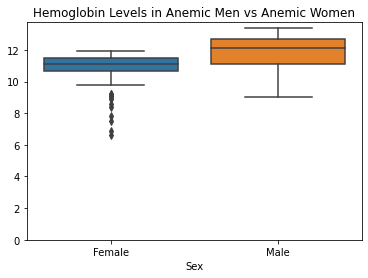

In [39]:
hemo = sns.boxplot(x = anemia['GENDER'], y = anemia[anemia['LAB_TEST'] == 'Hemoglobin']['RESULT'])
hemo.set(ylim = (0, None))
hemo.set_ylabel('Hemoglobin (mg/dL)')
hemo.set_xlabel('Sex')
hemo.set_title('Hemoglobin Levels in Anemic Men vs Anemic Women')

fig = hemo.get_figure()
fig.savefig('../images/Anemia_Hemoglobin.jpeg')

### It looks like the means are similar, but I'm not a doctor, a mean difference of about 1 mg/dL could be a lot larger than I think. So, I should probably test if this difference in mean is statistically significant.

### H0: There is no difference between hemoglobin levels in mean and women with anemia.

### H1: Men with anemia have a higher average hemoglobin level than women with anemia.

### P-VALUE: 0.05

In [40]:
stats.ttest_ind(female_anemia[female_anemia['LAB_TEST'] == 'Hemoglobin']['RESULT'], male_anemia[male_anemia['LAB_TEST'] == 'Hemoglobin']['RESULT'])

Ttest_indResult(statistic=-13.318371926342884, pvalue=9.283874135739387e-36)

### With a p-value this small, It looks like men with anemia do have higher average hemglobin levels than women with anemia.

### This makes me wonder, is this actually because anemia affects men and women differently, or do men simply have higher hemoglobin levels naturally?

### These aren't mutually exclusive scenarios, it's possible that men could have higher hemoglobin naturally, and that they are affected by anemia differently as well, so I can't test this directly here. However, I can test if men have naturally higher hemoglobin for some more insight.

### H0: There is no difference between hemoglobin levels in mean and women without anemia.

### H1: Men without anemia have a higher average hemoglobin level than women without anemia.

### P-VALUE: 0.05

### First, let's break out the graph again for a better visual.

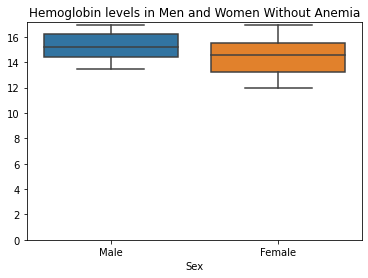

In [41]:
hemo2 = sns.boxplot(x = no_anemia['GENDER'], y = no_anemia[no_anemia['LAB_TEST'] == 'Hemoglobin']['RESULT'])
hemo2.set(ylim = (0, None))
hemo2.set_ylabel('Hemoglobin (mg/dL)')
hemo2.set_xlabel('Sex')
hemo2.set_title('Hemoglobin levels in Men and Women Without Anemia')

fig3 = hemo2.get_figure()
fig3.savefig('../images/Hemo_Without_Anemia.jpeg')

In [42]:
stats.ttest_ind(female_no_anemia[female_no_anemia['LAB_TEST'] == 'Hemoglobin']['RESULT'], male_no_anemia[male_no_anemia['LAB_TEST'] == 'Hemoglobin']['RESULT'])

Ttest_indResult(statistic=-9.02967623116839, pvalue=1.2683051458765443e-18)

### With a p-value this much lower than 0.05, I have to accept the alternative hypothesis. Men without anemia seem to naturally have higher levels of hemoglobin than women without anemia.

### While this certainly doesn't mean that anemia can't affect hemoglobin levels in men and women differently, it does mean that if that is the case, it isn't the only reason that men with anemia have higher hemoglobin levels than women with anemia.